# Building a Predictive Model to Assess Contestant Success in the Competition

<a id="table_of_contents"></a>

### Table of contents

<ol>
  <li><a href="#pre">Data preprocessing</a>
    <ul>
      <li><a href='#dataset'>Import the data sets</a></li>
      <li><a href='#new'>Create the new data set</a></li>
      <li><a href='#cleaning'>Execute cleaning procedures</a></li>
      <li><a href='#encode'>Encoding categorical data</a></li>
      <li><a href='#split'> Splitting the dataset into the Training set and Test set</a></li>
      <li><a href='#scaling'> Feature scaling</a></li>
    </ul>
  </li>

  <li><a href="#models">Models</a>
    <ul>
      <li><a href="#logistic">Logistic Regression Model</a>
      <li><a href="#random">Random Forest Classification</a>
      <li><a href="#tree">Decision Tree Classification</a>   
    </ul>
  </li>

  <li><a href="#insights">Insights</a></li>
  
  
  </li>
</ol>

<a id="pre"></a>
## Data preprocessing
<a href="#table_of_contents">Navigate to contents</a>

<a id="dataset"></a>
Examine the overall dataset
<br>
<a href="#table_of_contents">Navigate to contents</a>

In [1]:
import numpy as np
import pandas as pd
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#connect to mysql database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="NilArj_21",
    database="project",
)

In [3]:
# participants table
df_table_1 = pd.read_sql("SELECT * FROM la_mas_draga;", conn)

print(df_table_1.head())

  Lugar    Participante                       Nombre    Lugar de residencia  \
0     1      Alexis 3XL                 Itzel Moreno  Matamoros, Tamaulipas   
1     2  Sophia Jiménez            Guillermo Jiménez      Guadalajara, Jal.   
2     3        Gvajardo               Pablo Guajardo         Monterrey, NL.   
3     4        Job Star  José Job Carrisalez Sánchez        Saltillo, Coah.   
4     5      Soro Nasty                    Luis Soro        Monterrey, N.L.   

   Edad       Selección  Retos ganados     Resultado  Temporada  
0    28  Audiciones MTY              2      Ganadora          2  
1    31  Audiciones GDL              3    Finalistas          2  
2    29     Secretísima              1    Finalistas          2  
3    34  Audiciones MTY              0  6ª eliminada          2  
4    33    Pase directo              0  5ª eliminada          2  


C:\Users\nilvi\AppData\Local\Temp\ipykernel_9908\344945470.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_table_1 = pd.read_sql("SELECT * FROM la_mas_draga;", conn)


In [4]:
# progress table
df_table_2 = pd.read_sql("SELECT * FROM la_mas_draga_scores;", conn)

print(df_table_2.head())

       Concursante  Episodio Nombre_de_episodio Progreso  Calificacion
0  Aisha Dollkills         1          Artesanal    MENOS             7
1  Aisha Dollkills         2            Juguete     SALV            14
2  Aisha Dollkills         3            A Color     ELIM            12
3  Aisha Dollkills         4          Recursiva    FUERA             0
4  Aisha Dollkills         5             Famosa    FUERA            12


C:\Users\nilvi\AppData\Local\Temp\ipykernel_9908\2370231956.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_table_2 = pd.read_sql("SELECT * FROM la_mas_draga_scores;", conn)


In [5]:
#standardizing column names for data sets integration
df_table_2 = df_table_2.rename(columns = {"Concursante" : "Participante"})

In [6]:
merge_tables = pd.merge(df_table_1, df_table_2, on="Participante", how="inner")

In [7]:
merge_tables.head()

,Lugar,Participante,Nombre,Lugar de residencia,Edad,Selección,Retos ganados,Resultado,Temporada,Episodio,Nombre_de_episodio,Progreso,Calificacion
0,1,Alexis 3XL,Itzel Moreno,"Matamoros, Tamaulipas",28,Audiciones MTY,2,Ganadora,2,1,Típica,ALTA MENOS,14
1,1,Alexis 3XL,Itzel Moreno,"Matamoros, Tamaulipas",28,Audiciones MTY,2,Ganadora,2,2,Religiosa,ALTA,13
2,1,Alexis 3XL,Itzel Moreno,"Matamoros, Tamaulipas",28,Audiciones MTY,2,Ganadora,2,3,Luchona,ALTA,18
3,1,Alexis 3XL,Itzel Moreno,"Matamoros, Tamaulipas",28,Audiciones MTY,2,Ganadora,2,4,Piñata,LA MÁS,18
4,1,Alexis 3XL,Itzel Moreno,"Matamoros, Tamaulipas",28,Audiciones MTY,2,Ganadora,2,5,Juanga,SALV,15


In [8]:
df = pd.DataFrame(merge_tables)

In [9]:
df.head()

,Lugar,Participante,Nombre,Lugar de residencia,Edad,Selección,Retos ganados,Resultado,Temporada,Episodio,Nombre_de_episodio,Progreso,Calificacion
0,1,Alexis 3XL,Itzel Moreno,"Matamoros, Tamaulipas",28,Audiciones MTY,2,Ganadora,2,1,Típica,ALTA MENOS,14
1,1,Alexis 3XL,Itzel Moreno,"Matamoros, Tamaulipas",28,Audiciones MTY,2,Ganadora,2,2,Religiosa,ALTA,13
2,1,Alexis 3XL,Itzel Moreno,"Matamoros, Tamaulipas",28,Audiciones MTY,2,Ganadora,2,3,Luchona,ALTA,18
3,1,Alexis 3XL,Itzel Moreno,"Matamoros, Tamaulipas",28,Audiciones MTY,2,Ganadora,2,4,Piñata,LA MÁS,18
4,1,Alexis 3XL,Itzel Moreno,"Matamoros, Tamaulipas",28,Audiciones MTY,2,Ganadora,2,5,Juanga,SALV,15


<a id="cleaning"></a>
Execute cleaning procedures
<br>
<a href="#table_of_contents">Navigate to contents</a>

In [10]:
df["Resultado"].unique()

array(['Ganadora', 'Finalistas', '6ª eliminada', '5ª eliminada',
       '3ª eliminadas', '2ª eliminada', 'Ganadora[11]\u200b',
       '8ª/9ª eliminada', '7ª eliminada', '4ª eliminada', '3ª eliminada',
       '1ª eliminada', 'Finalista', '9ª/10ª eliminada', '8ª eliminada',
       '6ª/7ª eliminada', '4° eliminado', 'Finalista secreta', 'Abandona',
       '6ª Eliminada', '5ª Eliminada', '4ª Eliminada', '3ª Eliminada',
       '2ª Eliminada', '1ª Eliminada'], dtype=object)

In [11]:
df["Resultado"] =df["Resultado"].str.replace('/', '')
df["Resultado"] =df["Resultado"].str.replace(r'[\d\[ªº\u200b/°]|\[1-9]\d?\d? al 16|secreta\b', '')

C:\Users\nilvi\AppData\Local\Temp\ipykernel_9908\2839179131.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Resultado"] =df["Resultado"].str.replace(r'[\d\[ªº\u200b/°]|\[1-9]\d?\d? al 16|secreta\b', '')


In [12]:
df["Resultado"].unique()

array(['Ganadora', 'Finalistas', ' eliminada', ' eliminadas', 'Ganadora]',
       'Finalista', ' eliminado', 'Finalista ', 'Abandona', ' Eliminada'],
      dtype=object)

In [13]:
result_dict = {'eliminada' :'Eliminada','eliminadas' :'Eliminada','eliminado':'Eliminada','Finalistas': 'Finalista', 'Ganadora]':'Ganadora', 'Abandona' :'Eliminada'}
df["Resultado"] = df["Resultado"].str.strip().replace(result_dict)

In [14]:
df["Resultado"].unique()

array(['Ganadora', 'Finalista', 'Eliminada'], dtype=object)

In [15]:
df["Progreso"].unique()

array(['ALTA MENOS', 'ALTA', 'LA MÁS', 'SALV', 'MENOS', 'Compitiendo',
       'Ganadora', 'BAJA', 'Finalista', 'MENOS BAJA', 'ELIM', 'Invitada',
       'FUERA', 'BAJAS', 'LAS MÁS', 'ALTO', 'EL MÁS', 'BAJO', 'Invitado',
       'ALTA EG', 'SALV MENOS', 'ENTRA', 'GANA', 'VUELVE', 'ABAND',
       'MENOS SALV', 'ABDICÓ', 'ALTAS', 'Invitadas'], dtype=object)

In [16]:
progress_dict = {'BAJAS':'BAJA','LAS MÁS':'LA MÁS','EL MÁS':'LA MÁS','BAJO':'BAJA','Invitado':'Invitada', 'ALTAS':'ALTA','ALTO':'ALTA' ,'Invitadas':'Invitada', 'ALTA MENOS':'MENOS', 'MENOS BAJA':'BAJA', 'ALTA EG':'ALTA','SALV MENOS':'MENOS','MENOS SALV':'SALV'}
df["Progreso"] = df["Progreso"].str.strip().replace(progress_dict)

In [17]:
df["Progreso"].unique()

array(['MENOS', 'ALTA', 'LA MÁS', 'SALV', 'Compitiendo', 'Ganadora',
       'BAJA', 'Finalista', 'ELIM', 'Invitada', 'FUERA', 'ENTRA', 'GANA',
       'VUELVE', 'ABAND', 'ABDICÓ'], dtype=object)

In [18]:
#separate the dependent and independant variables
X = df[["Edad", "Retos ganados", "Temporada", "Episodio", "Calificacion", "Progreso" ]]
y = df[["Resultado"]]

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 492
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Edad           493 non-null    int64 
 1   Retos ganados  493 non-null    int64 
 2   Temporada      493 non-null    int64 
 3   Episodio       493 non-null    int64 
 4   Calificacion   493 non-null    int64 
 5   Progreso       493 non-null    object
dtypes: int64(5), object(1)
memory usage: 27.0+ KB


In [20]:
X.head()

,Edad,Retos ganados,Temporada,Episodio,Calificacion,Progreso
0,28,2,2,1,14,MENOS
1,28,2,2,2,13,ALTA
2,28,2,2,3,18,ALTA
3,28,2,2,4,18,LA MÁS
4,28,2,2,5,15,SALV


In [21]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 0 to 492
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Resultado  493 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


<a id="encode"></a>
Encoding categorical data
<br>
<a href="#table_of_contents">Navigate to contents</a>

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['Progreso'])], remainder='passthrough')
X = ct.fit_transform(X)

In [23]:
print(X)

  (0, 13)	1.0
  (0, 16)	28.0
  (0, 17)	2.0
  (0, 18)	2.0
  (0, 19)	1.0
  (0, 20)	14.0
  (1, 2)	1.0
  (1, 16)	28.0
  (1, 17)	2.0
  (1, 18)	2.0
  (1, 19)	2.0
  (1, 20)	13.0
  (2, 2)	1.0
  (2, 16)	28.0
  (2, 17)	2.0
  (2, 18)	2.0
  (2, 19)	3.0
  (2, 20)	18.0
  (3, 12)	1.0
  (3, 16)	28.0
  (3, 17)	2.0
  (3, 18)	2.0
  (3, 19)	4.0
  (3, 20)	18.0
  (4, 14)	1.0
  :	:
  (486, 19)	4.0
  (487, 7)	1.0
  (487, 16)	24.0
  (487, 18)	5.0
  (487, 19)	5.0
  (488, 11)	1.0
  (488, 16)	24.0
  (488, 18)	5.0
  (488, 19)	6.0
  (489, 7)	1.0
  (489, 16)	24.0
  (489, 18)	5.0
  (489, 19)	7.0
  (490, 7)	1.0
  (490, 16)	24.0
  (490, 18)	5.0
  (490, 19)	8.0
  (491, 7)	1.0
  (491, 16)	24.0
  (491, 18)	5.0
  (491, 19)	9.0
  (492, 7)	1.0
  (492, 16)	24.0
  (492, 18)	5.0
  (492, 19)	10.0


In [24]:
X = X.toarray()
print(X)

[[ 0.  0.  0. ...  2.  1. 14.]
 [ 0.  0.  1. ...  2.  2. 13.]
 [ 0.  0.  1. ...  2.  3. 18.]
 ...
 [ 0.  0.  0. ...  5.  8.  0.]
 [ 0.  0.  0. ...  5.  9.  0.]
 [ 0.  0.  0. ...  5. 10.  0.]]


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

c:\Users\nilvi\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
print(y)

[2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]

<a id="split"></a>
Splitting the dataset into the Training set and Test set
<br>
<a href="#table_of_contents">Navigate to contents</a>

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state= 1 )

In [28]:
X_train.shape

(369, 21)

In [29]:
X_test.shape

(124, 21)

<a id="scaling"></a>
Feature scaling
<br>
<a href="#table_of_contents">Navigate to contents</a>

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id="pre"></a>
## Models
<a href="#table_of_contents">Navigate to contents</a>

<a id="logistic"></a>
Logistic Regression Model
<br>
<a href="#table_of_contents">Navigate to contents</a>

In [31]:
#train the logistic regression model on the training data
from sklearn.linear_model import LogisticRegression
lrm_classifier = LogisticRegression(random_state = 0)
lrm_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
#predicting the Test set results
y_lrm_pred = lrm_classifier.predict(X_test)

In [33]:
#check accurancy score
from sklearn.metrics import accuracy_score
lrm_ac_sc = accuracy_score(y_test, y_lrm_pred)
print(lrm_ac_sc)

0.7661290322580645


In [34]:
#examining errors and mislabeling in the confusion matrix
from sklearn.metrics import confusion_matrix
lrm_cm = confusion_matrix(y_test, y_lrm_pred)
print(lrm_cm)

[[78  6  0]
 [12 17  0]
 [ 5  6  0]]


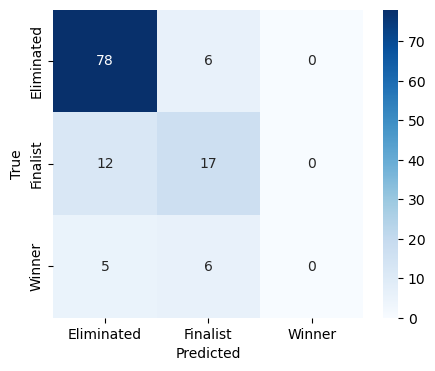

<Figure size 640x480 with 0 Axes>

In [55]:
def plot_confusion_matrix (y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt='d' , xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

class_names = "Eliminated", "Finalist", "Winner"
plot_confusion_matrix(y_test, y_lrm_pred, class_names)


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_lrm_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        84
           1       0.59      0.59      0.59        29
           2       0.00      0.00      0.00        11

    accuracy                           0.77       124
   macro avg       0.47      0.50      0.49       124
weighted avg       0.69      0.77      0.73       124



In [37]:
report_1 = classification_report(y_test,y_lrm_pred, output_dict=True, zero_division=0)
lrm_report = pd.DataFrame(report_1).transpose()

<a id="random"></a>
Random Forest Classification
<br>
<a href="#table_of_contents">Navigate to contents</a>

In [38]:
#train the random forest classification model on the training data
from sklearn.ensemble import RandomForestClassifier
rfc_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [39]:
#predicting the Test set results
y_rfc_pred = rfc_classifier.predict(X_test)

In [40]:
#check accurancy score
rfc_ac_sc = accuracy_score(y_test, y_rfc_pred)
print(rfc_ac_sc)

0.8467741935483871


In [41]:
#examining errors and mislabeling in the confusion matrix
rfc_cm = confusion_matrix(y_test, y_rfc_pred)
print(rfc_cm)

[[79  5  0]
 [ 7 22  0]
 [ 5  2  4]]


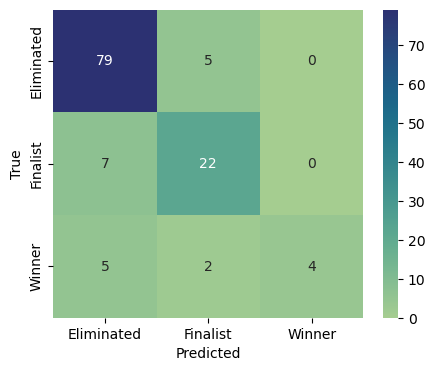

<Figure size 640x480 with 0 Axes>

In [56]:
def plot_confusion_matrix (y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="crest", fmt='d' , xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

class_names = "Eliminated", "Finalist", "Winner"
plot_confusion_matrix(y_test, y_rfc_pred, class_names)

In [43]:
print(classification_report(y_test,y_rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        84
           1       0.76      0.76      0.76        29
           2       1.00      0.36      0.53        11

    accuracy                           0.85       124
   macro avg       0.88      0.69      0.73       124
weighted avg       0.85      0.85      0.84       124



In [44]:
report_2 = classification_report(y_test,y_rfc_pred, output_dict=True)
rfc_report = pd.DataFrame(report_2).transpose()

<a id="tree"></a>
Decision Tree Classification
<br>
<a href="#table_of_contents">Navigate to contents</a>

In [45]:
#train the decision classification model on the training data
from sklearn.tree import DecisionTreeClassifier
dtc_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
#predicting the Test set results
y_dtc_pred = dtc_classifier.predict(X_test)

In [47]:
#check accurancy score
dtc_ac_sc = accuracy_score(y_test, y_dtc_pred)
print(dtc_ac_sc)

0.9596774193548387


In [48]:
#examining errors and mislabeling in the confusion matrix
dtc_cm = confusion_matrix(y_test, y_dtc_pred)
print(dtc_cm)

[[81  3  0]
 [ 2 27  0]
 [ 0  0 11]]


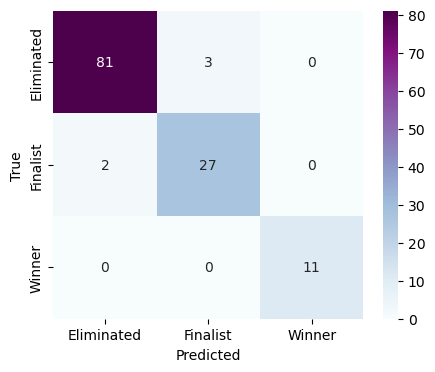

<Figure size 640x480 with 0 Axes>

In [57]:
def plot_confusion_matrix (y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="BuPu", fmt='d' , xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

class_names = "Eliminated", "Finalist", "Winner"
plot_confusion_matrix(y_test, y_dtc_pred, class_names)

In [50]:
print(classification_report(y_test,y_dtc_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        84
           1       0.90      0.93      0.92        29
           2       1.00      1.00      1.00        11

    accuracy                           0.96       124
   macro avg       0.96      0.97      0.96       124
weighted avg       0.96      0.96      0.96       124



In [51]:
report_3 = classification_report(y_test,y_dtc_pred, output_dict=True)
dtc_report = pd.DataFrame(report_3).transpose()

<a id="insights"></a>
## Insights

1. The decision tree classification model emerges as the most suitable approach for this specific classification task.
2. It's important to recognize that competitions of this nature are intricate and involve subjective evaluation by judges.
<a href="#table_of_contents">Navigate to contents</a>

In [52]:
print(lrm_report)

              precision    recall  f1-score     support
0              0.821053  0.928571  0.871508   84.000000
1              0.586207  0.586207  0.586207   29.000000
2              0.000000  0.000000  0.000000   11.000000
accuracy       0.766129  0.766129  0.766129    0.766129
macro avg      0.469087  0.504926  0.485905  124.000000
weighted avg   0.693294  0.766129  0.727473  124.000000


In [53]:
print(rfc_report)

              precision    recall  f1-score     support
0              0.868132  0.940476  0.902857   84.000000
1              0.758621  0.758621  0.758621   29.000000
2              1.000000  0.363636  0.533333   11.000000
accuracy       0.846774  0.846774  0.846774    0.846774
macro avg      0.875584  0.687578  0.731604  124.000000
weighted avg   0.854218  0.846774  0.836344  124.000000


In [54]:
print(dtc_report)

              precision    recall  f1-score     support
0              0.975904  0.964286  0.970060   84.000000
1              0.900000  0.931034  0.915254   29.000000
2              1.000000  1.000000  1.000000   11.000000
accuracy       0.959677  0.959677  0.959677    0.959677
macro avg      0.958635  0.965107  0.961771  124.000000
weighted avg   0.960290  0.959677  0.959898  124.000000
